In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import itertools
from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [2]:
data = pd.read_csv("E:\Projects folder\census\\census1.csv")
print("Number of Observations in adult dataset:", data.shape)
data.head()

Number of Observations in adult dataset: (199523, 42)


,age,class,industry_code,occupation_code,education,wage_hour,enrolled edu inst last wk,marital status,major_industry_code,major_occupation_code,...,country_birth_mother,country_birth_self,citizenship,business_type,taxable_inc_amount,veterans_questionnaire,veterans_benefits,weeks_year,instance_weight,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [3]:
#data.columns = ['age', 'class',
 #              'industry_code','occupation_code','education', 
 #               'wage_hour', 'enrolled_edu_inst_last_wk', 'marital_status' ,'industry_code1', 'occupation_code1', 
 #               'mace' ,'hispanic', 'sex' ,'member_labor_union', 'reason_unemployment' ,
 #               'employment_type' ,'capital_gains' ,'capital_losses' ,
 #               'divdend_stocks', 'tax_status' ,'region_previous_residence','state_previous_residence' ,
 #               'household_family_stat' ,'summary_household' ,'migration_code_change_msa', 'migration_code_change_reg',
 #               'migration code-move within reg','stay_same_house_1','migration_prev_res_sunbelt', 
 #               'num_persons_worked_employer', 'family_below_18','country_birth_father','country_birth_mother' ,
 #               'country_birth_self' ,'citizenship','business_type','taxable_inc_amount', 'veterans_questionnaire' ,
 #               'veterans_benefits' ,'weeks_year' ,'instance_weight', 'income'  ]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                               199523 non-null int64
class                             199523 non-null object
industry_code                     199523 non-null int64
occupation_code                   199523 non-null int64
education                         199523 non-null object
wage_hour                         199523 non-null int64
enrolled edu inst last wk         199523 non-null object
marital status                    199523 non-null object
major_industry_code               199523 non-null object
major_occupation_code             199523 non-null object
mace                              199523 non-null object
hispanic                          199523 non-null object
sex                               199523 non-null object
member_labor_union                199523 non-null object
reason_unemployment               199523 non-null object
employment_type                   1995

In [5]:
#import pandas_profiling
#profile_report = pandas_profiling.ProfileReport(data)
#profile_report

In [6]:
pd.isnull(data).any()

#checking for nulls

age                               False
class                             False
industry_code                     False
occupation_code                   False
education                         False
wage_hour                         False
enrolled edu inst last wk         False
marital status                    False
major_industry_code               False
major_occupation_code             False
mace                              False
hispanic                          False
sex                               False
member_labor_union                False
reason_unemployment               False
employment_type                   False
capital_gains                     False
capital_losses                    False
divdend_stocks                    False
tax_status                        False
region_previous_residence         False
state_previous_residence          False
household_family_stat             False
summary_household                 False
migration_code_change_msa         False


In [7]:
data.describe()

,age,industry_code,occupation_code,wage_hour,capital_gains,capital_losses,divdend_stocks,migration_code_change_msa,family_below_18,taxable_inc_amount,veterans_benefits,weeks_year,instance_weight
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [8]:
data.head(2)

,age,class,industry_code,occupation_code,education,wage_hour,enrolled edu inst last wk,marital status,major_industry_code,major_occupation_code,...,country_birth_mother,country_birth_self,citizenship,business_type,taxable_inc_amount,veterans_questionnaire,veterans_benefits,weeks_year,instance_weight,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000


In [9]:
data['income'].value_counts(dropna=False, normalize=True).head()
#checking for balance of the target. It shows the target is highly imbalance.

-50000      0.937942
 50000+.    0.062058
Name: income, dtype: float64

In [10]:
data['income']=data['income'].map({'-50000': 0, ' 50000+.': 1})
data.head(4)
#mapping the target the variable

,age,class,industry_code,occupation_code,education,wage_hour,enrolled edu inst last wk,marital status,major_industry_code,major_occupation_code,...,country_birth_mother,country_birth_self,citizenship,business_type,taxable_inc_amount,veterans_questionnaire,veterans_benefits,weeks_year,instance_weight,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


In [11]:
#Separate categorical and numerical columns
cat_column = data.dtypes[data.dtypes == 'object']
num_column = data.dtypes[data.dtypes != 'object']

In [12]:
for col in list(cat_column.index):
    print(f"--------------------{col.title()}-------------------------")
    total= data[col].value_counts()
    percent = total / data.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')
    
    
#State_Previous_Residence, Migration_Code_Change_Reg, Migration Code-Move Within Reg
#Stay_Same_House_1, Num_Persons_Worked_Employer, Num_Persons_Worked_Employer, Country_Birth_Mother, Country_Birth_Self
# Citizenship

#has unknown values represented by ?

#Education

#9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
#Create Elementary object for 1st-4th, 5th-6th, 7th-8th

#Marital Status

#Married-civilian spouse present,Married-spouse absent, Married-A F spouse present comes under Married separated.
#Divorced, separated, windowed comes under category separated.

#class

#Self-emp-not-incor, Self-emp-incor comes under category self employed
#Local-gov,State-gov,Federal-gov comes under category goverment emloyees



--------------------Class-------------------------
                                  total   percent
 Not in universe                 100245  0.502423
 Private                          72028  0.361001
 Self-employed-not incorporated    8445  0.042326
 Local government                  7784  0.039013
 State government                  4227  0.021186
 Self-employed-incorporated        3265  0.016364
 Federal government                2925  0.014660
 Never worked                       439  0.002200
 Without pay                        165  0.000827


--------------------Education-------------------------
                                         total   percent
 High school graduate                    48407  0.242614
 Children                                47422  0.237677
 Some college but no degree              27820  0.139433
 Bachelors degree(BA AB BS)              19865  0.099562
 7th and 8th grade                        8007  0.040131
 10th grade                               7557  0.

                                 total   percent
 ?                               99696  0.499672
 Nonmover                        82538  0.413677
 Same county                      9812  0.049177
 Different county same state      2797  0.014018
 Not in universe                  1516  0.007598
 Different region                 1178  0.005904
 Different state same division     991  0.004967
 Abroad                            530  0.002656
 Different division same region    465  0.002331


--------------------Stay_Same_House_1 -------------------------
                               total   percent
 ?                             99696  0.499672
 Nonmover                      82538  0.413677
 Same county                    9812  0.049177
 Different county same state    2797  0.014018
 Not in universe                1516  0.007598
 Different state in South        973  0.004877
 Different state in West         679  0.003403
 Different state in Midwest      551  0.002762
 Abroad              

In [13]:
edit_columns = ['state_previous_residence','migration code-move within reg' , 
             'stay_same_house_1 ', 'num_persons_worked_employer', 'country_birth_mother', 
             'country_birth_self', 'citizenship ','migration_code_change_reg ' ]
# Replace ? with Unknown
for col in edit_columns:
    data.loc[data[col] == ' ?', col] = 'unknown'

In [14]:
# Check if ? is present
for col in edit_columns:
    print(f"? in {col}: {data[(data[col] == '?')].any().sum()}")

? in state_previous_residence: 0
? in migration code-move within reg: 0
? in stay_same_house_1 : 0
? in num_persons_worked_employer: 0
? in country_birth_mother: 0
? in country_birth_self: 0
? in citizenship : 0
? in migration_code_change_reg : 0


In [15]:
hs_grad = [' High school graduate',' 11th grade',' 10th grade',' 9th grade',' 12th grade no diploma']
elementary = [' 1st 2nd 3rd or 4th grade',' Less than 1st grade',' 7th and 8th grade',' 5th or 6th grade']

#replace elements in list.
data['education'].replace(hs_grad,' HS-grad',inplace = True)
data['education'].replace(to_replace = elementary,value = ' elementary_school',inplace = True)
data['education'].value_counts()

 HS-grad                                   71196
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 elementary_school                         13902
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
Name: education, dtype: int64

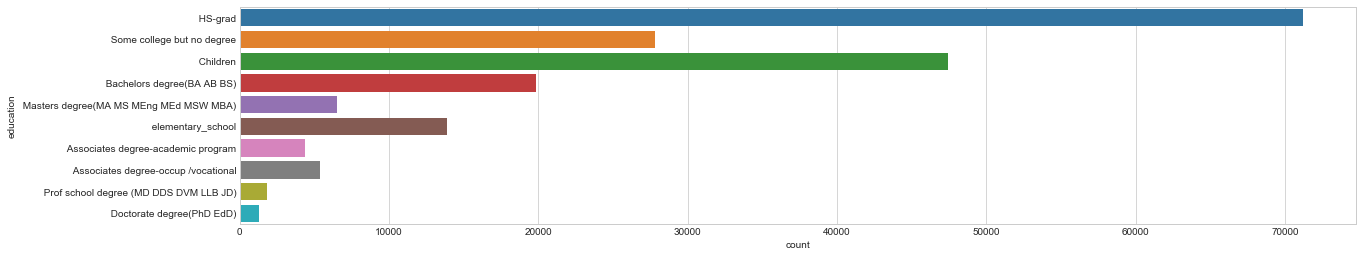

In [16]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="education", data=data);

In [17]:
married= [' Married-civilian spouse present',' Married-spouse absent',' Married-A F spouse present']
separated = [' Separated',' Divorced',' Widowed']

#replace elements in list.
data['marital status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital status'].replace(to_replace = separated,value = 'Separated',inplace = True)
data['marital status'].value_counts()

 Never married    86485
Married           86405
Separated         26633
Name: marital status, dtype: int64

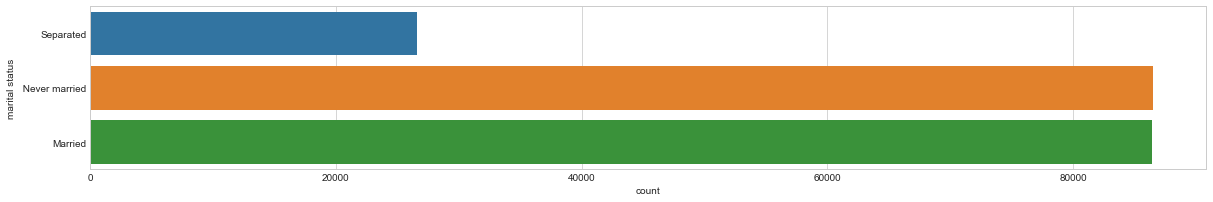

In [18]:
plt.figure(figsize=(20,3)) 
sns.countplot(y="marital status", data=data);

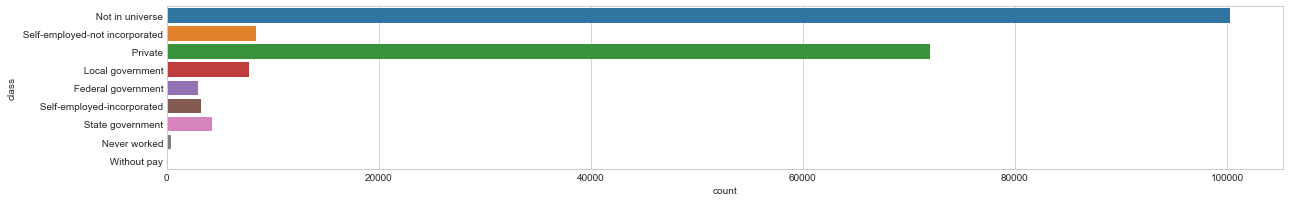

In [19]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="class", data=data);

In [20]:
self_employed = [' Self-employed-not incorporated',' Self-employed-incorporated']
govt_employees = [' State government',' Federal government', ' Local government']

#replace elements in list.
data['class'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['class'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['class'].value_counts()

 Not in universe    100245
 Private             72028
Govt_employees       14936
Self_employed        11710
 Never worked          439
 Without pay           165
Name: class, dtype: int64

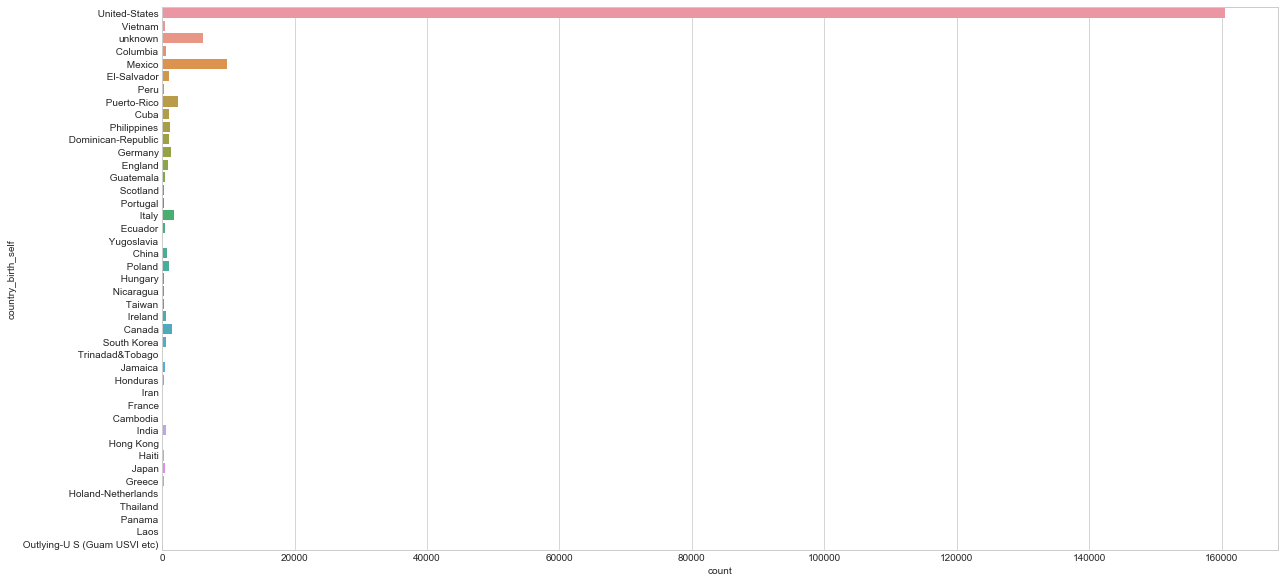

In [21]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="country_birth_self", data=data);

In [22]:
US = [' United-States']
Outside_US = ['unknown', ' Cambodia',' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
              ' France', ' Germany',' Greece',' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong Kong', ' Hungary',
              ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-U S (Guam USVI etc)', ' Panama',
              ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South Korea', ' Taiwan', ' Thailand',
              ' Trinadad&Tobago', ' Vietnam', ' Yugoslavia']

#replace elements in list.
data['country_birth_self'].replace(to_replace = US ,value = 'US',inplace = True)
data['country_birth_self'].replace(to_replace = Outside_US,value = 'Outside_US',inplace = True)

data['country_birth_self'].value_counts()

US            160479
Outside_US     39044
Name: country_birth_self, dtype: int64

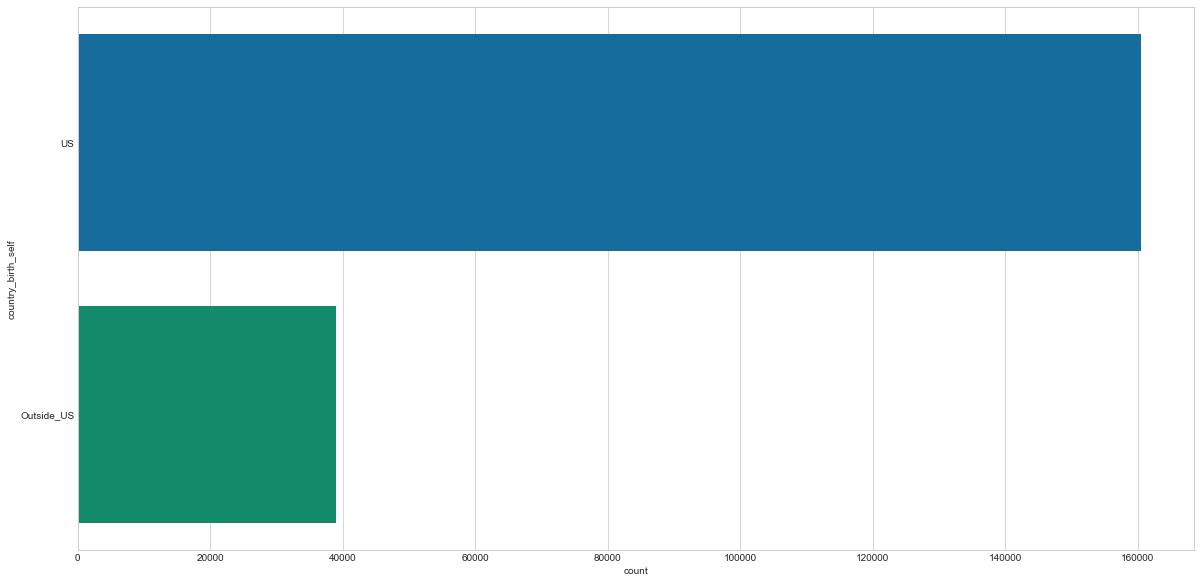

In [23]:
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(20,10)) 
sns.countplot(y="country_birth_self", data=data);

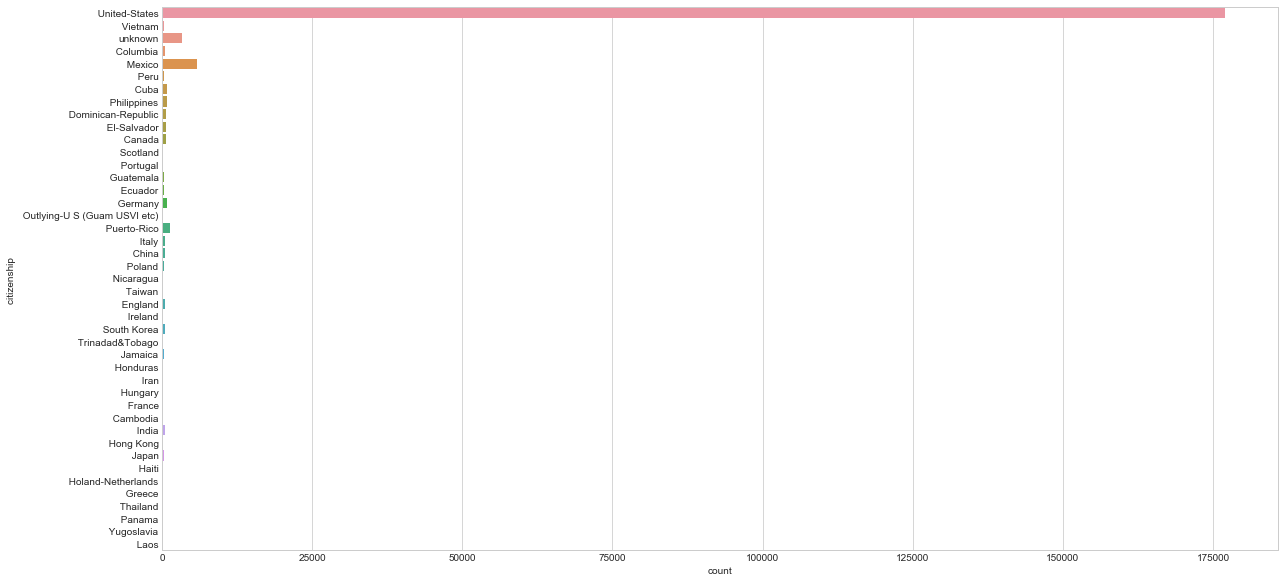

In [24]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(20,10)) 
sns.countplot(y="citizenship ", data=data);

In [25]:
US = [' United-States']
Outside_US = ['unknown', ' Cambodia',' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
              ' France', ' Germany',' Greece',' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong Kong', ' Hungary',
              ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-U S (Guam USVI etc)', ' Panama',
              ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South Korea', ' Taiwan', ' Thailand',
              ' Trinadad&Tobago', ' Vietnam', ' Yugoslavia']

#replace elements in list.
data['citizenship '].replace(to_replace = US ,value = 'US',inplace = True)
data['citizenship '].replace(to_replace = Outside_US,value = 'Outside_US',inplace = True)
data['citizenship '].value_counts() # Country_Birth_Mother

US            176989
Outside_US     22534
Name: citizenship , dtype: int64

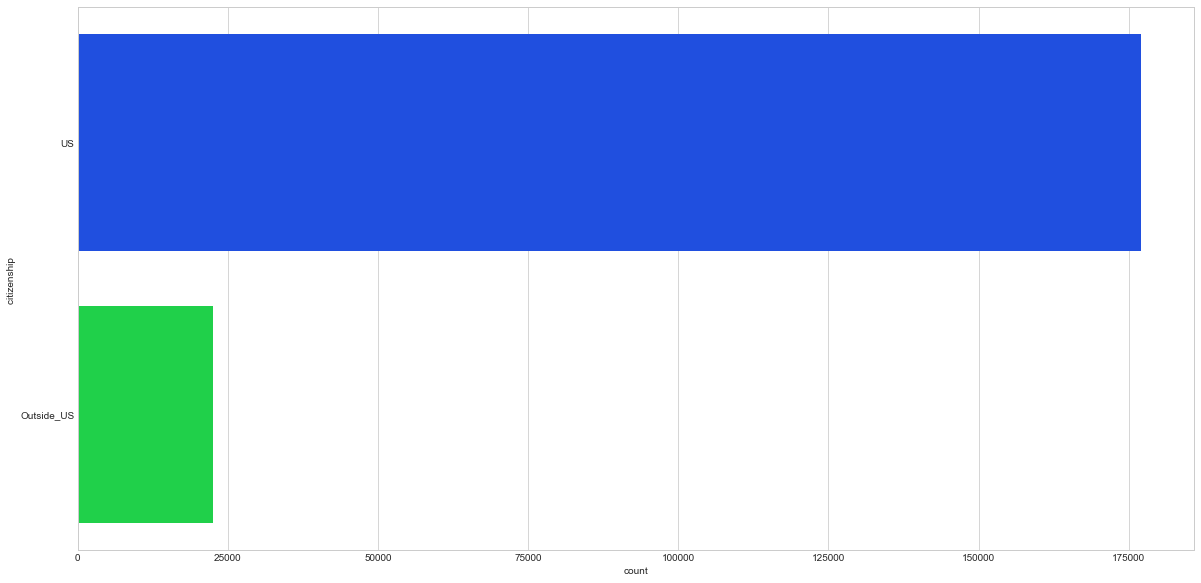

In [26]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(20,10)) 
sns.countplot(y="citizenship ", data=data);

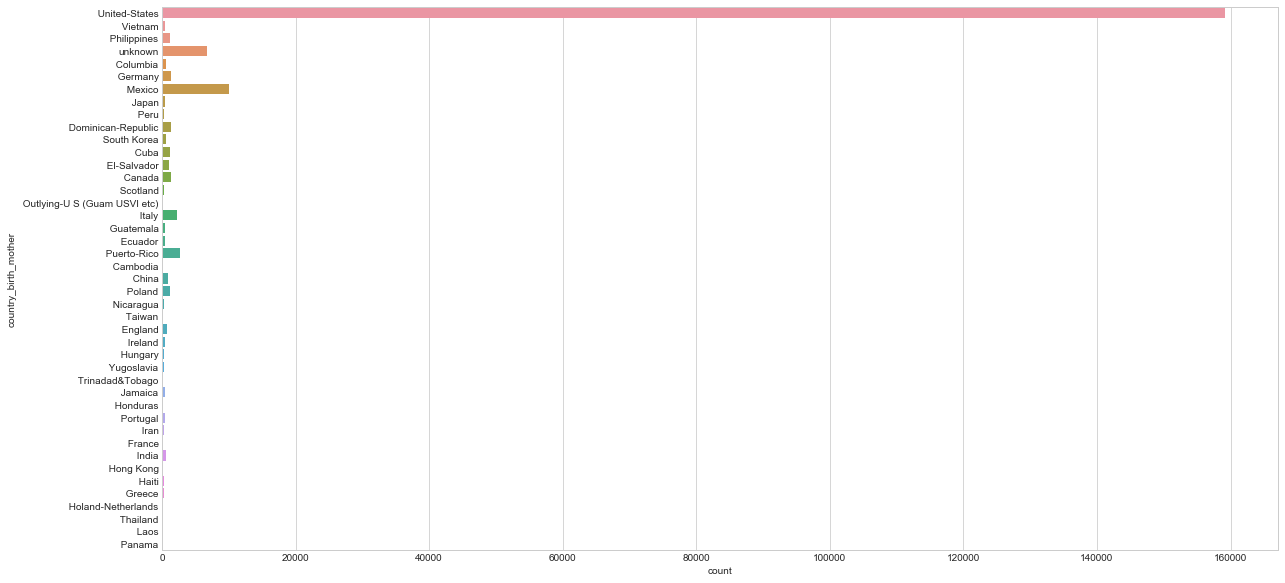

In [27]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="country_birth_mother", data=data);

In [28]:
US = [' United-States']
Outside_US = ['unknown', ' Cambodia',' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
              ' France', ' Germany',' Greece',' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong Kong', ' Hungary',
              ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-U S (Guam USVI etc)', ' Panama',
              ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South Korea', ' Taiwan', ' Thailand',
              ' Trinadad&Tobago', ' Vietnam', ' Yugoslavia']

#replace elements in list.
data['country_birth_mother'].replace(to_replace = US ,value = 'US',inplace = True)
data['country_birth_mother'].replace(to_replace = Outside_US,value = 'Outside_US',inplace = True)

data['country_birth_mother'].value_counts() # Country_Birth_Mother

US            159163
Outside_US     40360
Name: country_birth_mother, dtype: int64

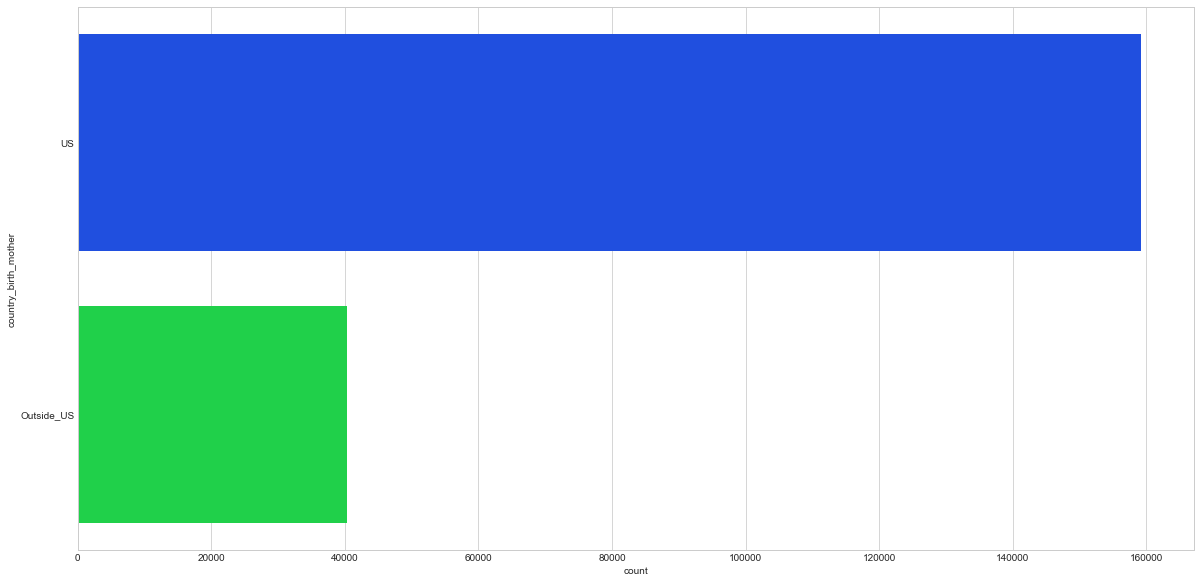

In [29]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="country_birth_mother", data=data);

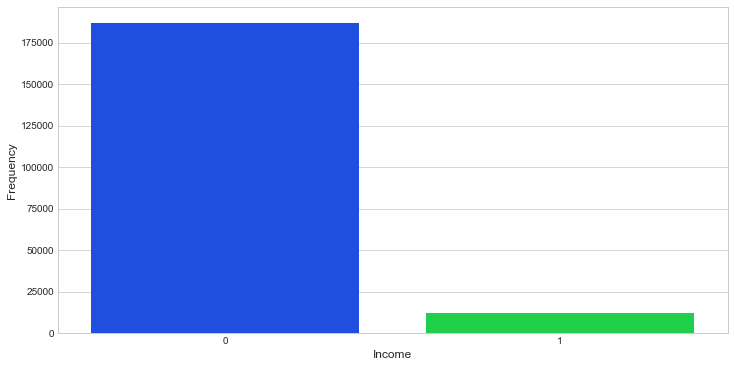

In [30]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = data);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);
#Our dataset has 187000 people earning <=50K i.e. 93% and remainng 7% earns more than 50K.

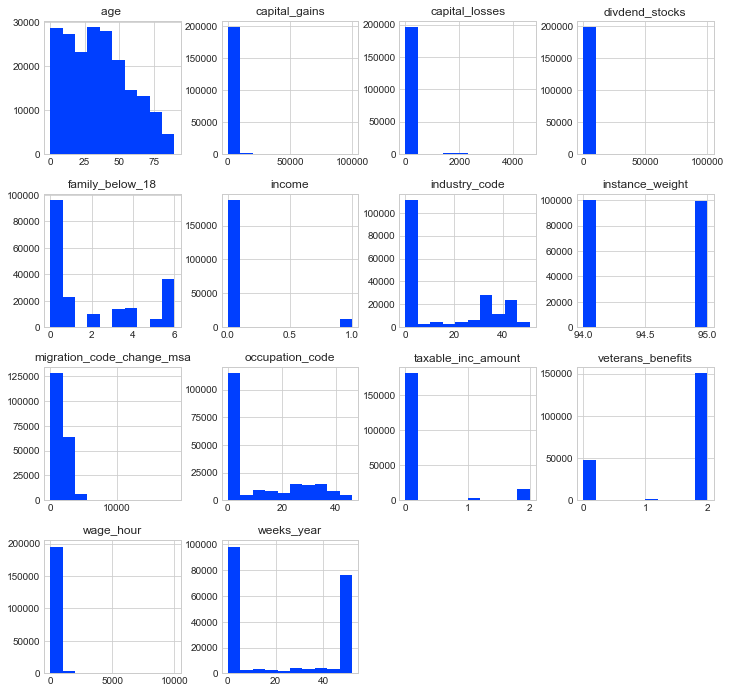

In [31]:
data[list(num_column.index)].hist(figsize = (12,12));

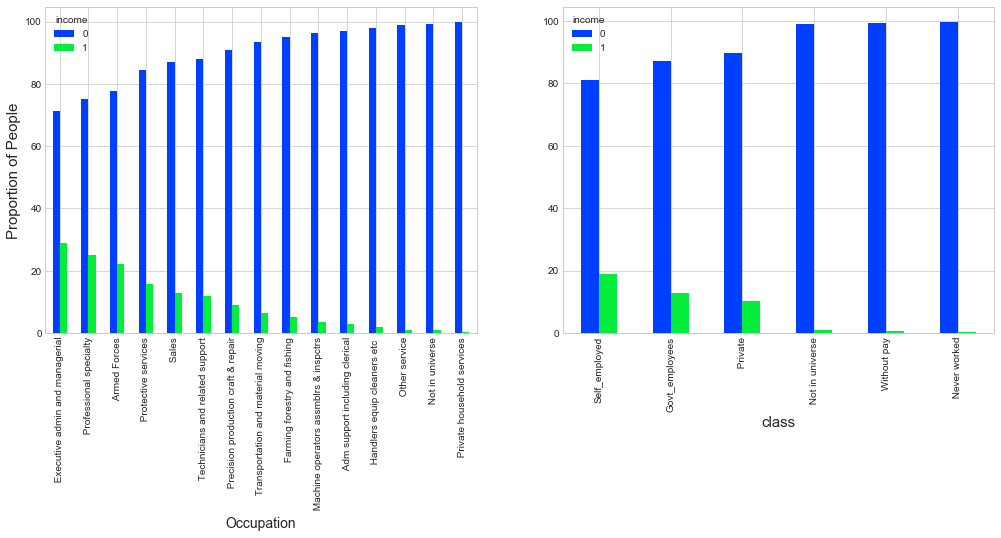

In [32]:
table_occ = pd.crosstab(data['major_occupation_code'], data['income'])
table_class = pd.crosstab(data['class'], data['income'])
table_edu = pd.crosstab(data['education'], data['income'])
table_marital = pd.crosstab(data['marital status'], data['income'])
table_race = pd.crosstab(data['mace'],data['income'])
table_sex = pd.crosstab(data['sex'], data['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occ.div(table_occ.sum(axis= 1),axis = 0)*100).sort_values(by= 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 15);


ax = fig.add_subplot(1,2,2)
plt.style.use('seaborn-whitegrid')
(table_class.div(table_class.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("class",fontsize = 15);

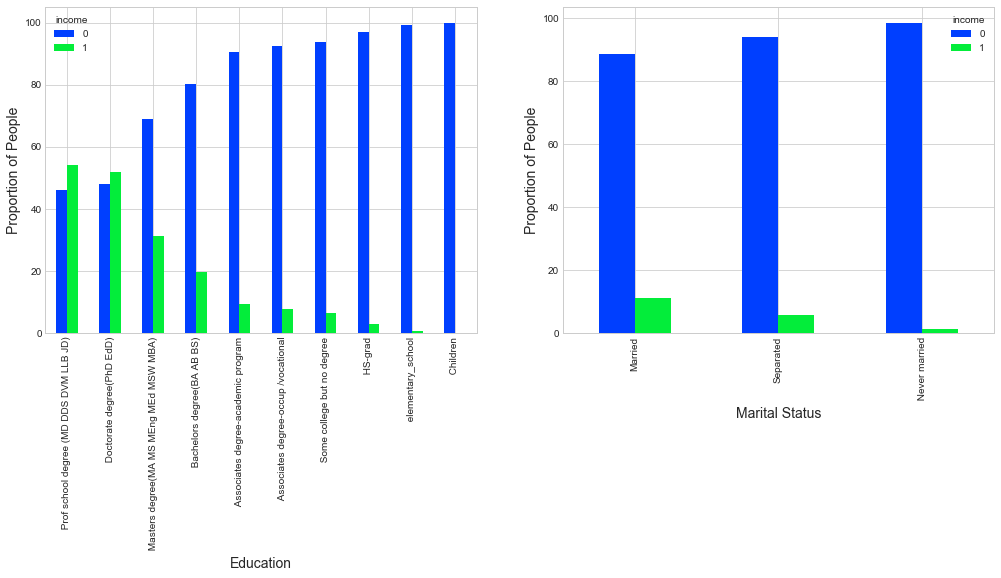

In [33]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

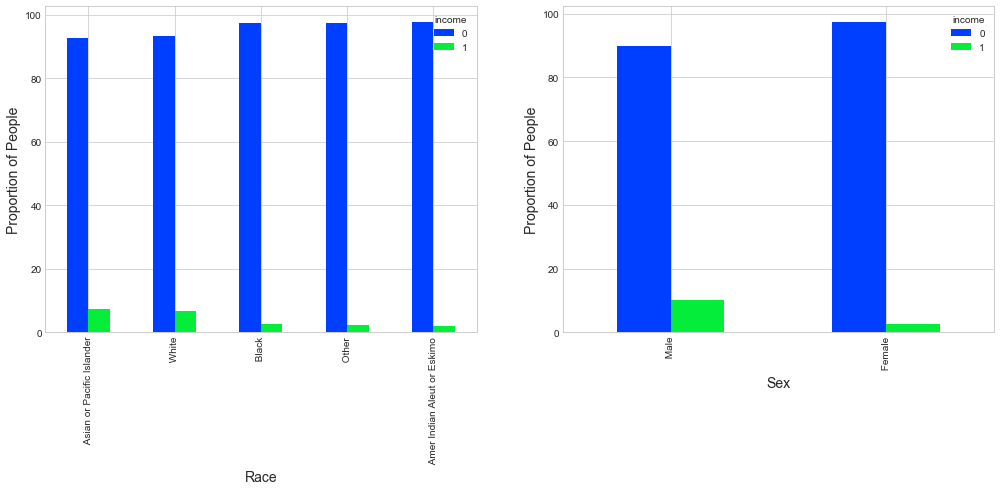

In [34]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

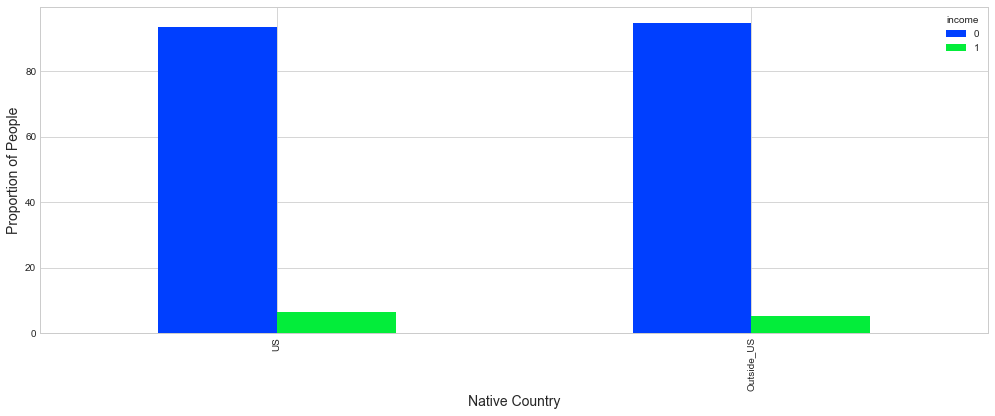

In [35]:
table_country = pd.crosstab(data['country_birth_self'], data['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

In [36]:
#Sex:- Out of total male 10 -15% of them earn salary more than 50K while less than 10% female earn more than 50K. 
#      92 -96% female earn less than 50K
#Race:- White and asain-pac-Islander earn salary more than 50K
#marital_status :- 15% of married people seem to earn salary greater than 50K.
#People having degree doctorate,professional school degree ,masters are earning salary more than 50K.
#Out of all the workclass, self employed people and government employess are making salary more than 50K.


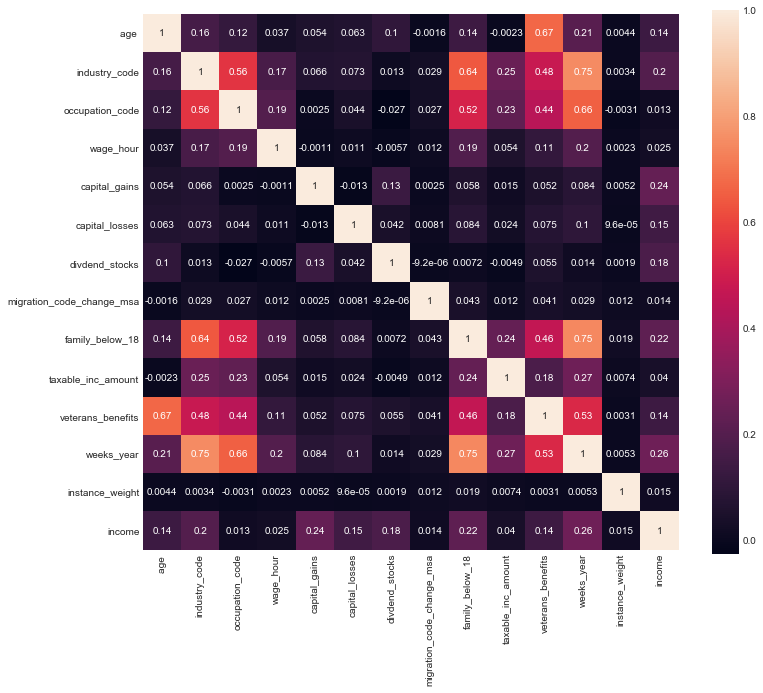

In [37]:
fig = plt.figure(figsize = (12,10))

sns.heatmap(data[list(num_column.index)].corr(),annot = True,square = True);


#From the following heatma we can find few varialbe like weeks worked in year, family_below_18, 
#industry_code are highly correlated.


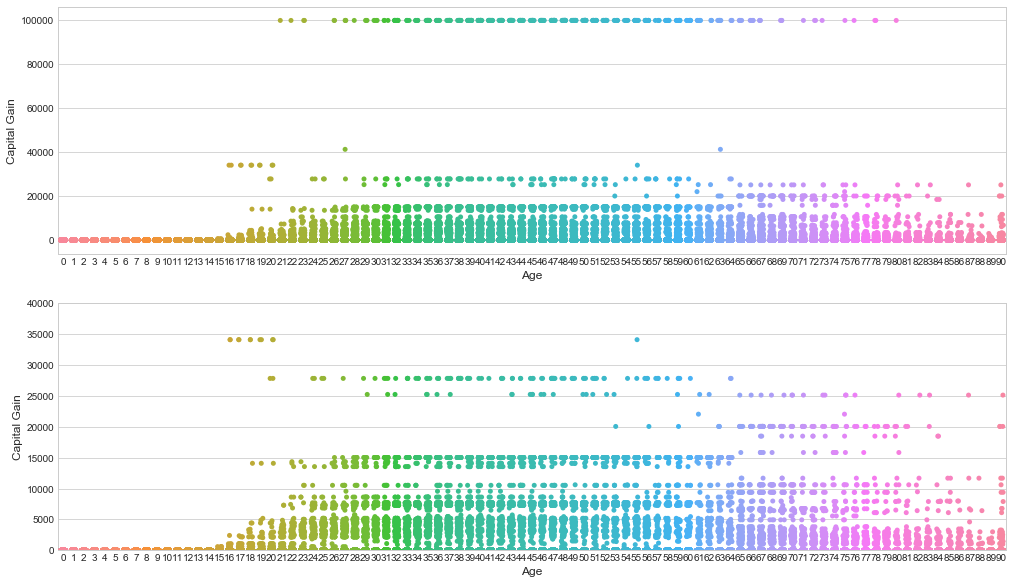

In [38]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age ', 'capital_gains', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age ', 'capital_gains', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);


#Between age 22 and 64 capital gain is upto 15000 and after that it increases and decreases at age 81.
#Age 89 doesn't follow the pattern.

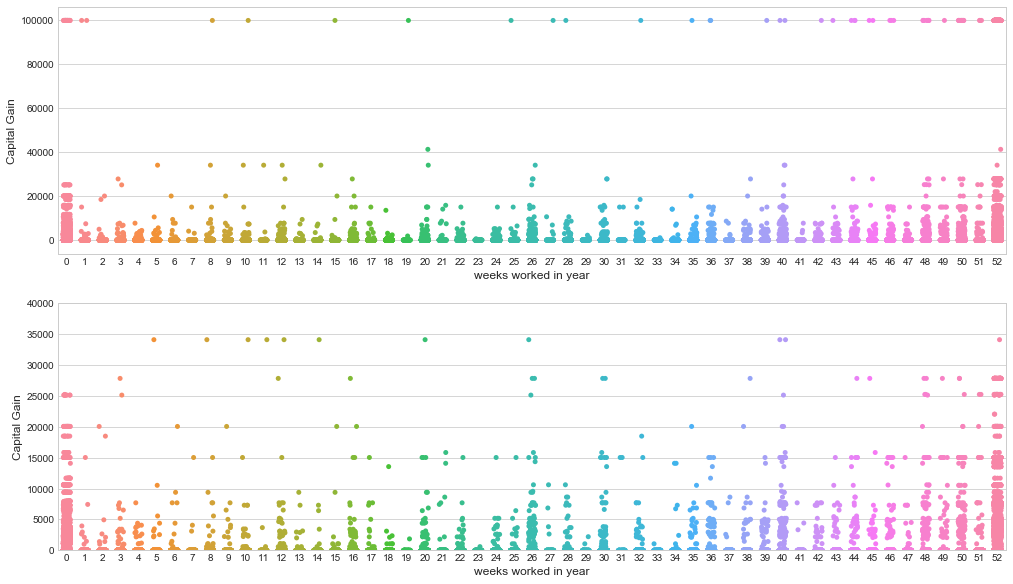

In [39]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('weeks_year', 'capital_gains', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('weeks worked in year',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('weeks_year', 'capital_gains', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('weeks worked in year',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);


#Majority of people can be seen working for 40,48,50 and 52 weeks per year and their capital gain seems to be high.
#There are few people working for 0 weeks for year  but have good capital gains. 
#week 31 has very low captial gains when compared to week 30 and week 32

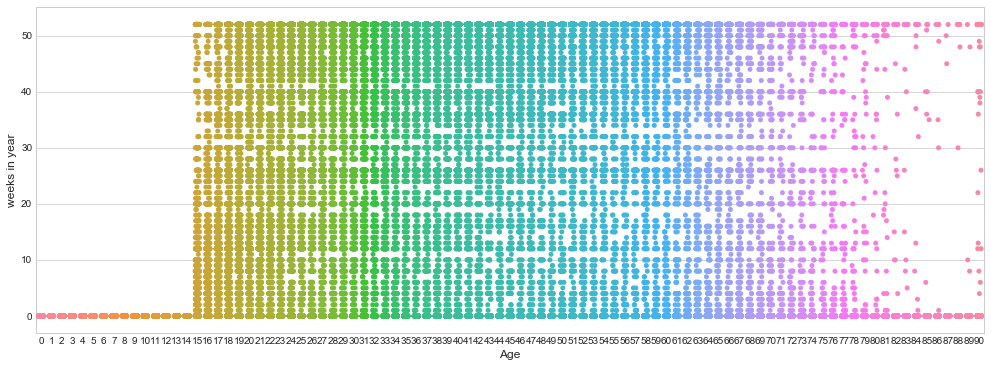

In [40]:
fig = plt.figure(figsize = (17,6))

sns.stripplot('age ','weeks_year', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('weeks in year',fontsize = 12);

In [41]:
num_col_update = ['age ','capital_gains', 'capital_losses','weeks_year' ,'instance_weight', 'family_below_18']
cat_col_update = ['class', 'education','enrolled edu inst last wk', 'marital status', 'major_industry_code', 'major_occupation_code', 
                'mace' ,'hispanic', 'sex' ,'member_labor_union', 'reason_unemployment' , 'employment_type',
               'tax_status' ,'region_previous_residence','state_previous_residence' ,
                'household_family_stat' ,'summary_household' ,'migration_code_change_msa', 'migration_code_change_reg ',
                'migration code-move within reg' , 'stay_same_house_1 ','migration_prev_res_sunbelt', 
                'num_persons_worked_employer','country_birth_father','country_birth_mother' ,
                'country_birth_self' ,'citizenship ', 'business_type','taxable_inc_amount', 'veterans_questionnaire' ,
                'veterans_benefits' , 'income']

In [42]:
#using Minmax scaler because as we saw from the various trends that different features have different scale.
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
scaler = RobustScaler()
pd.DataFrame(scaler.fit_transform(data[num_col_update]),columns = num_col_update).head(3)

,age,capital_gains,capital_losses,weeks_year,instance_weight,family_below_18
0,1.142857,0.0,0.0,-0.153846,1.0,-0.25
1,0.714286,0.0,0.0,0.846154,0.0,0.00
2,-0.428571,0.0,0.0,-0.153846,1.0,-0.25


In [43]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_update
        return df
pipeline = Pipeline([('selector',DataFrameSelector(num_col_update)),  
                     ('scaler',RobustScaler()),
                    ('transform',num_trans())])

In [44]:
num_df = pipeline.fit_transform(data)
num_df.shape
cols = ['']

In [45]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_update)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(data)
cat_df.shape

(199523, 263)

In [46]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [47]:
finaldata = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {finaldata.shape}")

Number of observations in final dataset: (199523, 270)


In [48]:
y = finaldata['income']
finaldata.drop(labels = ['id','income'],axis = 1,inplace = True)
X = finaldata

In [49]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 42)

# Logistic Regression

In [51]:
#Without Hyper Parameters Tuning
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9515177840519906
Recall Score: 0.7101359703337453
Precision Score: 0.32077051926298156
ROC_AUC curve: 0.8341799204679596
Confusion Matrix:
 [[55806  2433]
 [  469  1149]]


In [52]:
#With Hyper Parameters Tuning
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'penalty' : ['l1', 'l2'],
          'solver' : ['liblinear', 'saga'],
          'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}]
         }
model1 = GridSearchCV(model, param_grid=params, n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 15.0min
[Parallel(n_jobs=8)]: Done 252 out of 252 | elapsed: 25.9min finished


Best Hyper Parameters: {'C': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9520858045007268
Recall Score: 0.692972972972973
Precision Score: 0.35790061418202124
ROC_AUC curve: 0.8266612929753585
Confusion Matrix:
 [[55707  2300]
 [  568  1282]]


# Decision Tree

In [53]:
#Without Hyper Parameters Tuning
#DesicionTree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9299998329351621
Recall Score: 0.42213114754098363
Precision Score: 0.4600781686208822
ROC_AUC curve: 0.6937832117881136
Confusion Matrix:
 [[54019  1934]
 [ 2256  1648]]


In [54]:
#With Hyper Parameters Tuning
#DesicionTree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
          'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, 'balanced']
          }
model1 = GridSearchCV(model, param_grid=params, n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   15.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   42.4s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=8)]: Done 1969 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed:  9.3min
[Parallel(n_jobs=8)]: Done 2916 out of 2916 | elapsed: 10.4min finished


Best Hyper Parameters: {'class_weight': {1: 0.5, 0: 0.5}, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2}
Accuracy: 0.9474079890405467
Recall Score: 0.6220472440944882
Precision Score: 0.30876605248464545
ROC_AUC curve: 0.7897078280425264
Confusion Matrix:
 [[55603  2476]
 [  672  1106]]


# KNN Neighbors

In [55]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9439497468967707
Recall Score: 0.5760214333556597
Precision Score: 0.2400893355667225
ROC_AUC curve: 0.7646915473268601
Confusion Matrix:
 [[55642  2722]
 [  633   860]]


In [60]:
#With Hyper Parameters Tuning and grid search
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
params = {'n_neighbors':[3,5,7,8,9,10,12],
          'leaf_size':[10,12,30,50,100],
          'weights' : ['distance']}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 18.6min
[Parallel(n_jobs=8)]: Done 105 out of 105 | elapsed: 59.5min finished


Best Hyper Parameters:
 {'leaf_size': 10, 'n_neighbors': 12, 'weights': 'distance'}
Accuracy: 0.9471740982675376
Confusion Matrix:
 [[55940  2827]
 [  335   755]]
Recall Score: 0.6926605504587156
Precision Score: 0.21077610273590172
ROC_AUC curve: 0.822277660666763
Confusion Matrix:
 [[55940  2827]
 [  335   755]]
